# Loading in Data

Loading the scrapped data to pandas

In [2]:
import pandas as pd
import glob
import os
import numpy as np

path = ""
all_files = glob.glob(os.path.join(path, "*.csv"))
activity_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
activity_df['Created'] = pd.to_datetime(activity_df['Created'])
activity_df['Updated'] = pd.to_datetime(activity_df['Updated'])

# Filter by REPO
activity_df = activity_df[activity_df['SrcRepo'].isin(["finaccelteam/krdv-b2b-user", 
	"finaccelteam/krdv-b2b-transaction", "finaccelteam/ffi-krdv-b2b-partners", "finaccelteam/ffi-krdv-b2b", 
	"finaccelteam/seit-project-b2b"])]

# Filter by Dates
activity_df = activity_df[(activity_df['Updated'] >= '2023-10-01') & (activity_df['Updated'] <= '2023-12-31')]


pr_df = activity_df[["ID", "SrcRepo", "SrcBranch", "DestRepo", "DestBranch", "Title", "Description", "State", "Author", "Created", "Updated",
			"FileChanged", "Added", "Removed", "Total"]].copy().drop_duplicates()


/var/folders/1w/x093_7gd2h19dl5130_byrpm0000gr/T/ipykernel_57478/3817110994.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Make sure the data is loaded properly and do column manipulation for further analysis

In [3]:
activity_df['DateGroup'] = activity_df['Updated'].dt.strftime('%Y-%m')
activity_df['SrcRepo'] = activity_df['SrcRepo'].str.split('/').str[1]
activity_df['DestRepo'] = activity_df['DestRepo'].str.split('/').str[1]
activity_df.head()

pr_df['DateGroup'] = pr_df['Updated'].dt.strftime('%Y-%m')
pr_df['SrcRepo'] = pr_df['SrcRepo'].str.split('/').str[1]
pr_df['DestRepo'] = pr_df['DestRepo'].str.split('/').str[1]
pr_df.head()

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,DateGroup
122,113,krdv-b2b-transaction,bugfix/B2B-457-transaction-tenor-9-not-creatin...,krdv-b2b-transaction,release/staging,B2B-457 add 9 months tenor to loan tenor,B2B-457 add 9 months tenor to loan tenor,MERGED,Fendy Heryanto Johan,2023-10-06,2023-10-06,3,5,1,6,2023-10
123,111,krdv-b2b-transaction,feature/B2B-104-publish-transaction-settled-event,krdv-b2b-transaction,release/staging,B2B-104 fixed nine months enum not yet added i...,B2B-104 fixed nine months enum not yet added i...,MERGED,Fendy Heryanto Johan,2023-10-05,2023-10-05,1,2,0,2,2023-10
176,102,krdv-b2b-transaction,feature/INFR-17466,krdv-b2b-transaction,release/staging,feature:[INFR-17466]:command test and coverage,feature:\[INFR-17466\]:command test and coverage,MERGED,Yan Hasibuan,2023-10-02,2023-10-02,1,1,1,2,2023-10
198,110,krdv-b2b-transaction,feature/B2B-449-implement-admin-fee-amortizati...,krdv-b2b-transaction,release/staging,Feature/B2B-449 implement admin fee amortizati...,* B2B-449 add ent schema for admin fee amortiz...,MERGED,Fendy Heryanto Johan,2023-10-05,2023-10-06,22,284,73,357,2023-10
370,101,krdv-b2b-transaction,feature/INFR-17466,krdv-b2b-transaction,release/staging,feature:[INFR-17466]:fix consumer b2b trx cons...,feature:\[INFR-17466\]:gix consumer b2b trx co...,MERGED,Yan Hasibuan,2023-10-02,2023-10-02,1,1,1,2,2023-10


# PR Data Analysis

## Grouped by Repositories

[Text(0, 0, '10675'),
 Text(0, 0, '17441'),
 Text(0, 0, '18363'),
 Text(0, 0, '47710'),
 Text(0, 0, '1165')]

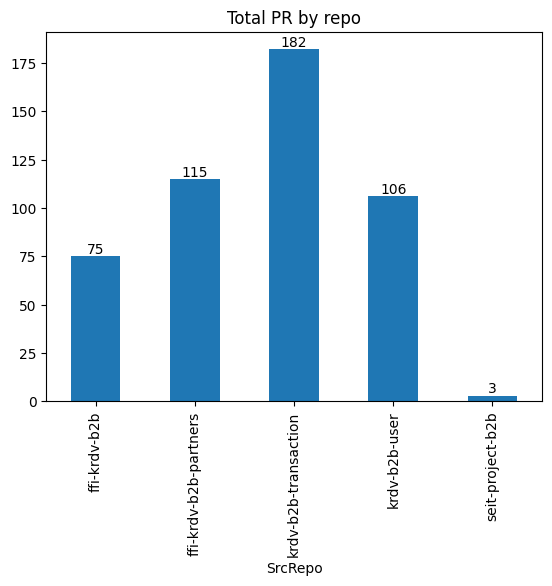

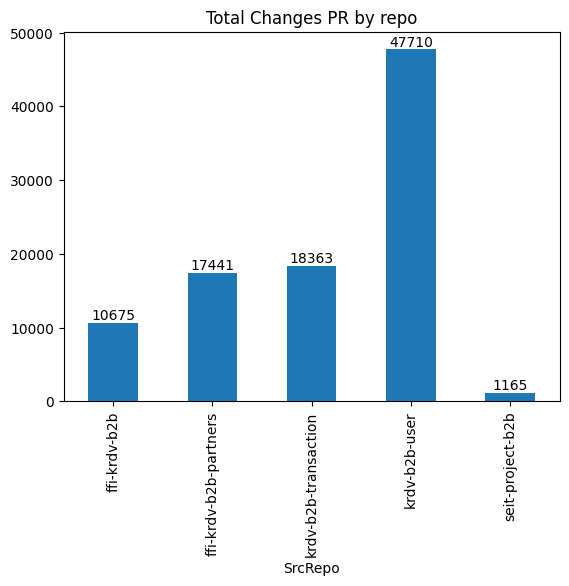

In [4]:
def pr_total_pr_count_by(df,myList= [],*args): 
    c = ['Total']
    return df.groupby(myList)[c].count()

def pr_total_sum_group_by(df,myList= [],*args): 
    c = ['Total']
    return df.groupby(myList)[c].sum()

repo_group = pr_total_pr_count_by(pr_df, ['SrcRepo'])
repo_group = repo_group.plot(kind= 'bar', y= 'Total', legend=False)
repo_group.set_title('Total PR by repo')
repo_group.set_ylabel('');
repo_group.bar_label(repo_group.containers[0])

repo_group = pr_total_sum_group_by(pr_df, ['SrcRepo'])
repo_group = repo_group.plot(kind= 'bar', y= 'Total', legend=False)
repo_group.set_title('Total Changes PR by repo')
repo_group.set_ylabel('');
repo_group.bar_label(repo_group.containers[0])

# PR Activity Analysis

## Group by Repositories

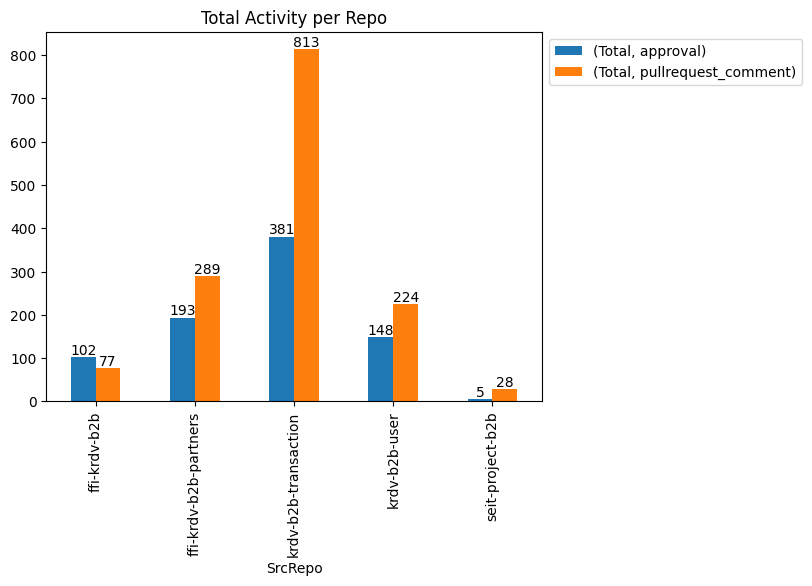

In [5]:
activity_repo_pivot = activity_df.pivot_table( index='SrcRepo', columns='Type', values=['Total'], aggfunc='count')
activity_repo_pivot = activity_repo_pivot.plot(kind="bar", legend=True)
activity_repo_pivot.set_title('Total Activity per Repo')
activity_repo_pivot.set_ylabel('');
activity_repo_pivot.bar_label(activity_repo_pivot.containers[0])
activity_repo_pivot.bar_label(activity_repo_pivot.containers[1])
activity_repo_pivot.legend(bbox_to_anchor=(1.0, 1.0))